In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Conc_Exp1.csv")
h0 = dataset['y'][0]
dataset = dataset.iloc[1:, :]
dataset

,t,y,v_{y},a_{y}
1,0.033211,1.178505,-0.138081,-7.692486
2,0.066522,1.166814,-0.388683,-5.709226
3,0.099811,1.152619,-0.489070,-4.842604
4,0.133111,1.134248,-0.702371,-7.963394
5,0.166389,1.105856,-1.028301,-7.966052
6,0.199700,1.065774,-1.254235,-9.256299
7,0.232967,1.022352,-1.592878,-11.065957
8,0.266278,0.959724,-2.042425,-11.468495
9,0.299578,0.886304,-2.342029,-4.119127
10,0.332856,0.803797,-2.351773,-3.429545


In [3]:
def g(t,h):
    return 2*(h-h0)/t**2

In [4]:
for i in dataset.iterrows():
    i = list(i[1])[0:2]
    print(g(i[0], i[1]))

4.54247452902174
-4.151425465219746
-4.693948367224299
-4.712804716460872
-5.0672076311387375
-5.527845022090414
-5.661979710492416
-6.100535708717452
-6.455844835150358
-6.718898613789083
-6.657298783003967
-6.733528817306743
-6.823970287203489
-6.863756565861173
-6.934244378416047
-6.92966749282545
-7.075554731503128


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
dataset = pd.read_csv("Conc_Exp1.csv")

In [7]:
X = dataset['t'].values.reshape(-1, 1)
Y = dataset['y'].values.reshape(-1, 1)

In [8]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [9]:
gravity = model.predict(np.array([[1]])) - model.predict(np.array([[0]]))
gravity

array([[-1.98882342]])

In [21]:
gravity = []
for i in range(1, len(dataset)-1):
    gravity.append((dataset['y'][i-1] - 2*dataset['y'][i] + dataset['y'][i+1])/(dataset['t'][i] - dataset['t'][i-1])**2)
grav_mean = np.mean(gravity)
velocity = dataset['t'].iloc[1:17].values * grav_mean
velocity

array([-0.2850237 , -0.57090562, -0.85659683, -1.14238339, -1.42797924,
       -1.71386116, -1.99936165, -2.28524357, -2.57103013, -2.85662598,
       -3.14241254, -3.4281991 , -3.71398567, -3.99958151, -4.28527272,
       -4.57172679])

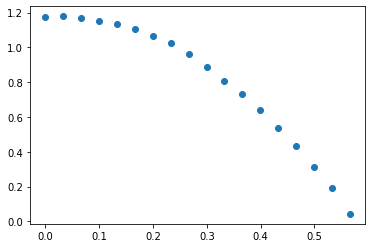

In [47]:
plt.scatter(dataset['t'], dataset['y'])

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
X = dataset['t'].values.reshape(-1, 1)
Y = dataset['y'].values.reshape(-1, 1)
model.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

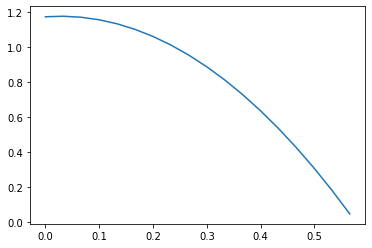

In [49]:
plt.plot(X, model.predict(X))

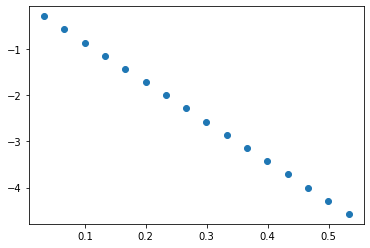

In [46]:
plt.scatter(dataset['t'].iloc[1:17], velocity)

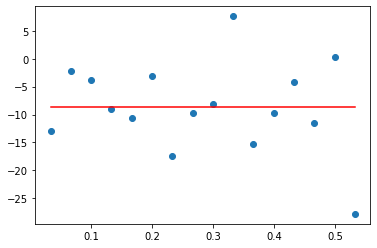

In [45]:
plt.scatter(dataset['t'].iloc[1:17], gravity)
plt.plot(dataset['t'].iloc[1:17], np.ones(16)*grav_mean, c='r')